In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



Problem 1. tf2_engineer.jpg Read the image in color.

Find the BGR value of the center pixel.

Cover the center by drawing a patch (rectangle) with code 329ea8.
Compare the new BGR value of the center pixel after the patch is applied.


Centre coordinates: (y=92, x=92)
Intensity at centre (BGR): [ 67  92 172]
Intensity at patch centre (BGR): [168 158  50]


(np.float64(-0.5), np.float64(183.5), np.float64(183.5), np.float64(-0.5))

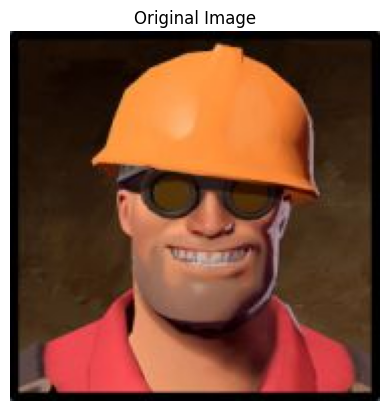

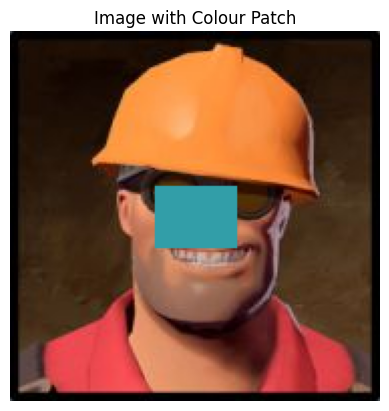

In [20]:

img = cv2.imread('tf2_engineer.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError('tf2_engineer.jpg not found. Place it in this directory.')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')


h, w = img.shape[:2]
yc, xc = h//2, w//2
intensity_center = img[yc, xc]
print(f'Centre coordinates: (y={yc}, x={xc})')
print(f'Intensity at centre (BGR): {intensity_center}')


patch_h, patch_w = 30, 40
patch_color_hex = '#329ea8'
patch_color_rgb = tuple(int(patch_color_hex.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
patch_color = (patch_color_rgb[2], patch_color_rgb[1], patch_color_rgb[0])  # BGR
top_left = (xc - patch_w//2, yc - patch_h//2)
bottom_right = (xc + patch_w//2, yc + patch_h//2)
img_patch = img.copy()
cv2.rectangle(img_patch, top_left, bottom_right, patch_color, thickness=-1)

intensity_patch_center = img_patch[yc, xc]
print(f'Intensity at patch centre (BGR): {intensity_patch_center}')

img_patch_rgb = cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_patch_rgb)
plt.title('Image with Colour Patch')
plt.axis('off')



Problem 2: Negative Image (einstein.tiff)
Description:

Read the image in grayscale

Compute the negative image (255 − r)

Display both original and negative

Print values of five sample pixels in both

Random pixel values (y,x): original -> negative
(559,723): 97 -> 158
(629,277): 121 -> 134
(192,754): 99 -> 156
(359,599): 131 -> 124
(9,70): 101 -> 154


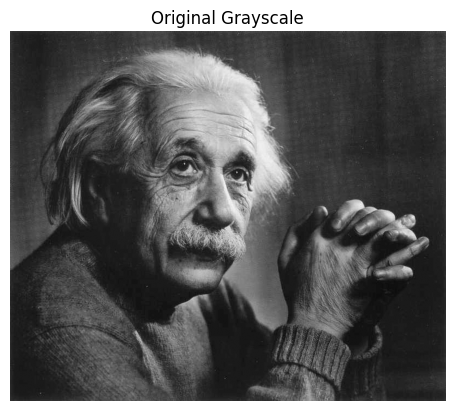

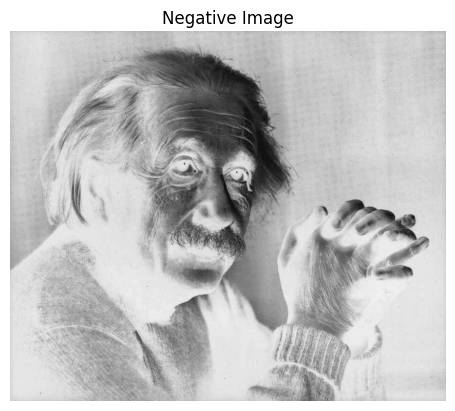

In [21]:

img_gray = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)
if img_gray is None:
    raise FileNotFoundError('einstein.tif not found.')
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

neg = 255 - img_gray
plt.figure()
plt.imshow(neg, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

np.random.seed(0)
coords = np.column_stack((np.random.randint(0, img_gray.shape[0], 5),
                          np.random.randint(0, img_gray.shape[1], 5)))
print('Random pixel values (y,x): original -> negative')
for y, x in coords:
    print(f'({y},{x}): {img_gray[y, x]} -> {neg[y, x]}')



Problem 3: Log and Inverse-Log Transformations (pout.tiff)
Description:

Read the image in grayscale

Apply log transform: s = c · log(1 + r)

Apply inverse-log transform: s = exp(r / c) − 1

Perform log then inverse-log to check data loss

(np.float64(-0.5), np.float64(239.5), np.float64(290.5), np.float64(-0.5))

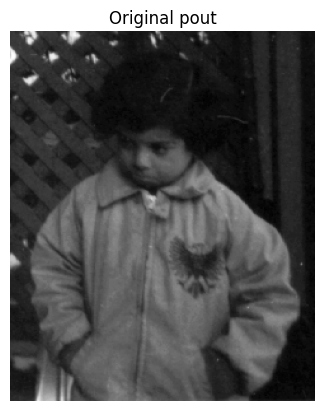

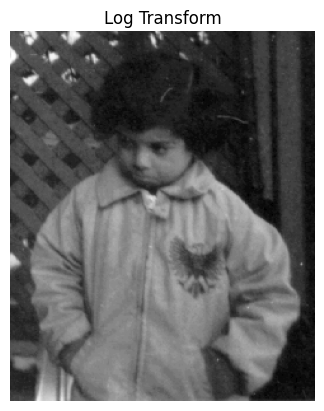

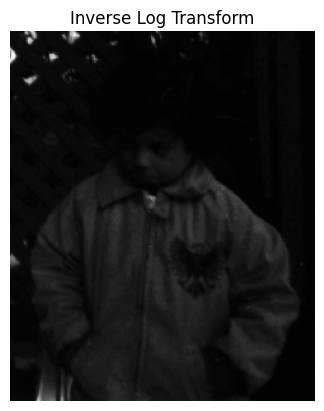

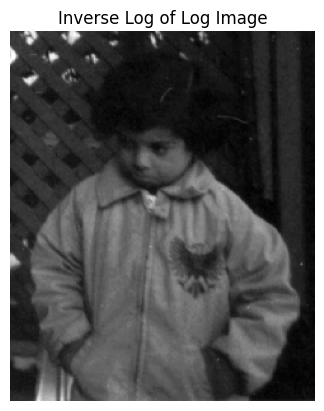

In [22]:

img_pout = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
if img_pout is None:
    raise FileNotFoundError('pout.tif not found.')
plt.imshow(img_pout, cmap='gray')
plt.title('Original pout')
plt.axis('off')

c = 255 / np.log(1 + np.max(img_pout))
log_img = c * np.log(1 + img_pout.astype(np.float64))
log_img = np.array(log_img, dtype=np.uint8)
plt.figure()
plt.imshow(log_img, cmap='gray')
plt.title('Log Transform')
plt.axis('off')

inv_log = np.exp(img_pout.astype(np.float64) / c) - 1
inv_log = np.clip(inv_log, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(inv_log, cmap='gray')
plt.title('Inverse Log Transform')
plt.axis('off')

inv_log2 = np.exp(log_img.astype(np.float64) / c) - 1
inv_log2 = np.clip(inv_log2, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(inv_log2, cmap='gray')
plt.title('Inverse Log of Log Image')
plt.axis('off')


Problem 4: Unsharp Masking (moon.tiff)
Description:

Spatial domain: subtract blurred image from original, then add weighted mask

Frequency domain: apply FFT-based high-pass filter for comparison

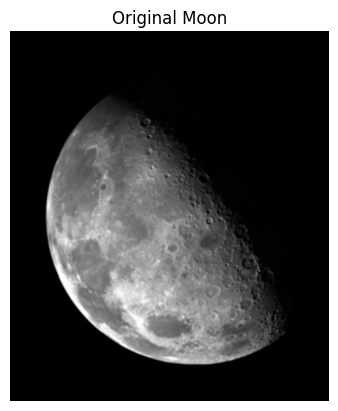

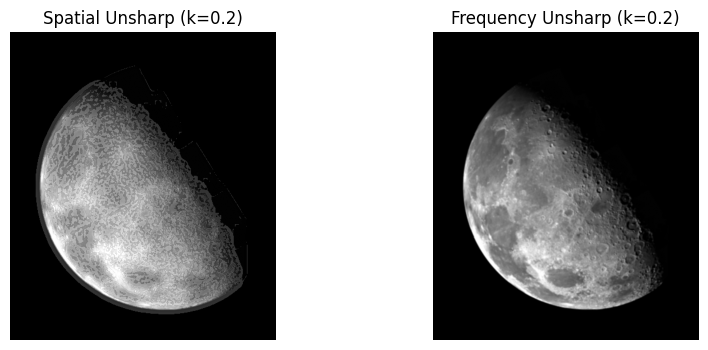

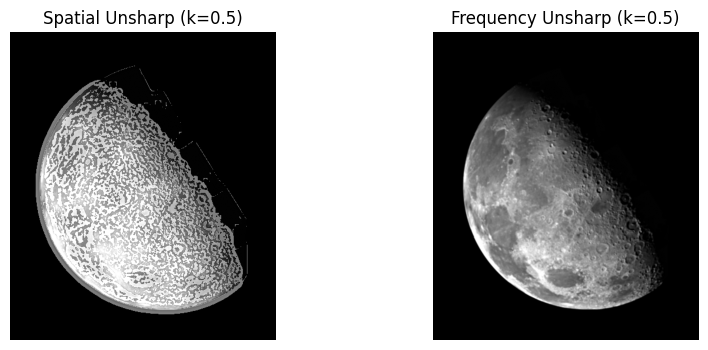

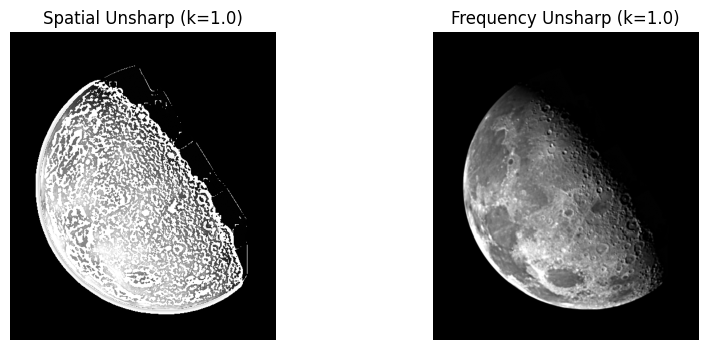

In [23]:

moon = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
if moon is None:
    raise FileNotFoundError('moon.tif not found.')
plt.figure()
plt.imshow(moon, cmap='gray')
plt.title('Original Moon')
plt.axis('off')

ks = [0.2, 0.5, 1.0]
D0 = 30
rows, cols = moon.shape
u = np.arange(rows)
v = np.arange(cols)
U, V = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
D = np.sqrt(U**2 + V**2)
H = 1 - np.exp(-(D**2) / (2*(D0**2)))

F = np.fft.fft2(moon)
F_shift = np.fft.fftshift(F)

for k in ks:
   
    blurred = cv2.GaussianBlur(moon, (0,0), sigmaX=3)
    mask = moon - blurred
    g_spatial = np.clip(moon + k * mask, 0, 255).astype(np.uint8)

   
    G_freq = (1 + k * H) * F_shift
    G_ifft = np.fft.ifft2(np.fft.ifftshift(G_freq))
    g_freq = np.clip(np.real(G_ifft), 0, 255).astype(np.uint8)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(g_spatial, cmap='gray')
    plt.title(f'Spatial Unsharp (k={k})')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(g_freq, cmap='gray')
    plt.title(f'Frequency Unsharp (k={k})')
    plt.axis('off')


Problem 5: Noise Removal (pcb.tiff)
Description:

Read the image in grayscale and view its histogram

Apply median filter for salt-and-pepper noise or Gaussian filter for Gaussian noise

(np.float64(-0.5), np.float64(454.5), np.float64(439.5), np.float64(-0.5))

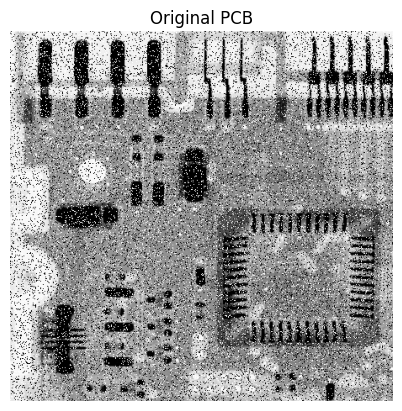

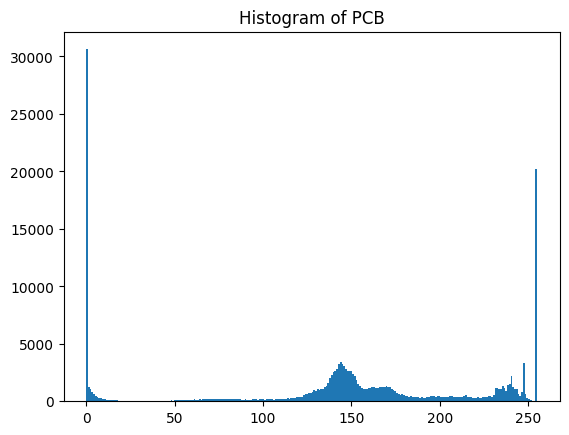

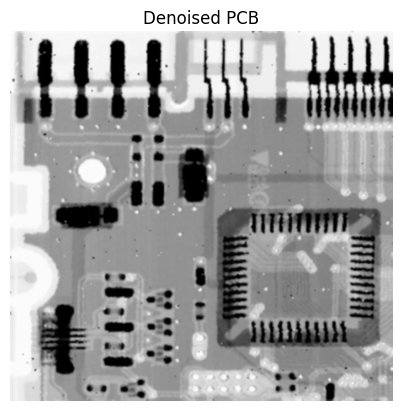

In [24]:

pcb = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)
if pcb is None:
    raise FileNotFoundError('pcb.tif not found.')
plt.figure()
plt.imshow(pcb, cmap='gray')
plt.title('Original PCB')
plt.axis('off')

plt.figure()
plt.hist(pcb.ravel(), bins=256)
plt.title('Histogram of PCB')

cleaned = cv2.medianBlur(pcb, 3)
cleaned = cv2.GaussianBlur(cleaned, (3,3), 0)
plt.figure()
plt.imshow(cleaned, cmap='gray')
plt.title('Denoised PCB')
plt.axis('off')


Problem 6: Pollen Image Enhancement (pollen.tiff)
Description:

Read the image and identify issues (blur, contrast, noise)

Apply at least two enhancement methods and compare quantitatively


(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

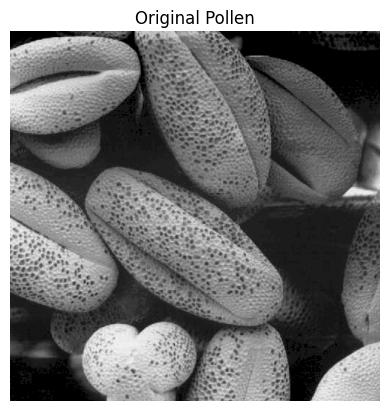

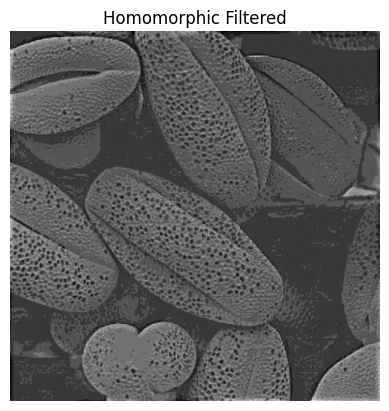

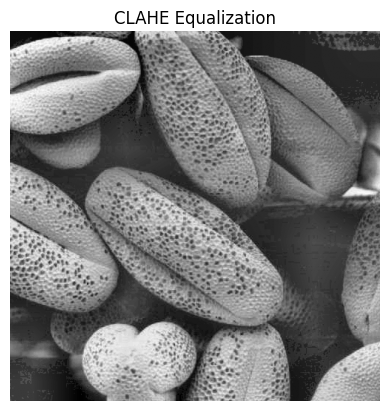

In [25]:

pollen = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)
if pollen is None:
    raise FileNotFoundError('pollen.tif not found.')
plt.figure()
plt.imshow(pollen, cmap='gray')
plt.title('Original Pollen')
plt.axis('off')


img_log = np.log1p(pollen.astype('float'))
M, N = pollen.shape
Y, X = np.ogrid[:M, :N]
center = (M/2, N/2)
Duv = ((Y-center[0])**2 + (X-center[1])**2)
gammaL, gammaH, c_val, D0 = 0.5, 2.0, 1.0, 30
H_hom = (gammaH - gammaL)*(1 - np.exp(-c_val*(Duv/(D0**2)))) + gammaL
fft_img = np.fft.fft2(img_log)
fft_shift = np.fft.fftshift(fft_img)
filtered = H_hom * fft_shift
ifft_shift = np.fft.ifftshift(filtered)
img_filtered = np.real(np.fft.ifft2(ifft_shift))
img_homomorphic = np.expm1(img_filtered)
img_homomorphic = np.clip(img_homomorphic, 0,255).astype(np.uint8)
plt.figure()
plt.imshow(img_homomorphic, cmap='gray')
plt.title('Homomorphic Filtered')
plt.axis('off')


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(pollen)
plt.figure()
plt.imshow(img_clahe, cmap='gray')
plt.title('CLAHE Equalization')
plt.axis('off')

